In [4]:
import os, glob, torch
import numpy as np

In [3]:
base_dir = '/home/xingxing/COMP5214/dataset/esd'

In [28]:
new_lines = []
for spk in os.listdir(base_dir):
    spk_dir = os.path.join(base_dir, spk)
    if (os.path.isdir(spk_dir)):
        if (int(spk) <= 10): continue
        # print(spk)
        spk_txt = os.path.join(spk_dir, spk + '.txt')
        spk_txt = open(spk_txt, 'r', encoding="utf-8")
        lines = spk_txt.readlines()
        for line in lines:
            lsplt = line.split()
            if len(lsplt) > 0:
                file_name, content, folder = lsplt[0], (' ').join(lsplt[1:-1]), lsplt[-1]
                files = glob.glob(spk_dir + '/' + folder + '/*/' + file_name + '.wav')
                if (len(files)):
                    file_path = files[0]
                    new_lines.append(file_path + '|' + content + '|' + spk)

In [31]:
new_lines_len = len(new_lines)
train, valid = new_lines[:int(new_lines_len * .98)], new_lines[int(new_lines_len * .2):]

In [32]:
len(train)

14990

In [33]:
len(valid)

7890

In [35]:
with open('/home/xingxing/COMP5214/tts_ref/Speech-Backbones/Grad-TTS-parallel/resources/filelists/esd/train.txt', 'w') as f:
    f.write('\n'.join(train))
    f.close()

with open('/home/xingxing/COMP5214/tts_ref/Speech-Backbones/Grad-TTS-parallel/resources/filelists/esd/valid.txt', 'w') as f:
    f.write('\n'.join(valid))
    f.close()

In [2]:
import numpy as np

spk_emb_dictionary = np.load('/home/xingxing/tts/tts_ref/Speech-Backbones/Grad-TTS-parallel/resources/filelists/esd/spk_emb.npy', allow_pickle=True)

In [5]:
torch.from_numpy(spk_emb_dictionary.item()['/home/xingxing/COMP5214/dataset/esd/0019/Happy/test/0019_000733.wav'])

tensor([0.1990, 0.0000, 0.0031, 0.0000, 0.0000, 0.0356, 0.0000, 0.0000, 0.1098,
        0.1327, 0.0532, 0.1824, 0.0208, 0.0843, 0.0130, 0.0000, 0.0000, 0.0000,
        0.0403, 0.0734, 0.1874, 0.0613, 0.0000, 0.0000, 0.0000, 0.0267, 0.0308,
        0.0000, 0.0000, 0.0000, 0.0392, 0.0586, 0.0054, 0.0000, 0.1044, 0.0730,
        0.0069, 0.0176, 0.0000, 0.0000, 0.0000, 0.0666, 0.0096, 0.0000, 0.0000,
        0.0074, 0.0000, 0.0208, 0.1006, 0.0000, 0.0000, 0.0088, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0314, 0.0000, 0.0786, 0.0000, 0.0906, 0.0041, 0.0846,
        0.0000, 0.0527, 0.0000, 0.0637, 0.1487, 0.0000, 0.0000, 0.0000, 0.0109,
        0.0000, 0.0656, 0.0017, 0.0227, 0.0000, 0.0000, 0.1594, 0.1080, 0.0000,
        0.0134, 0.0095, 0.2877, 0.0000, 0.0572, 0.0398, 0.0008, 0.0000, 0.0710,
        0.0775, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.1105, 0.0000, 0.0846, 0.0285, 0.0471, 0.0872, 0.0347, 0.0525,
        0.0000, 0.0928, 0.0000, 0.1316, 

In [1]:
# import torch
# from scipy.spatial.distance import cosine
# from transformers import AutoModel, AutoTokenizer

# # Import our models. The package will take care of downloading the models automatically
# tokenizer = AutoTokenizer.from_pretrained("princeton-nlp/sup-simcse-bert-base-uncased")
# model = AutoModel.from_pretrained("princeton-nlp/sup-simcse-bert-base-uncased")

# # Tokenize input texts
# texts = [
#     "There's a kid on a skateboard.",
#     "A kid is skateboarding.",
#     "A kid is inside the house."
# ]
# inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# # Get the embeddings
# with torch.no_grad():
#     embeddings = model(**inputs, output_hidden_states=True, return_dict=True).pooler_output

# # Calculate cosine similarities
# # Cosine similarities are in [-1, 1]. Higher means more similar
# cosine_sim_0_1 = 1 - cosine(embeddings[0], embeddings[1])
# cosine_sim_0_2 = 1 - cosine(embeddings[0], embeddings[2])

# print("Cosine similarity between \"%s\" and \"%s\" is: %.3f" % (texts[0], texts[1], cosine_sim_0_1))
# print("Cosine similarity between \"%s\" and \"%s\" is: %.3f" % (texts[0], texts[2], cosine_sim_0_2))

Cosine similarity between "There's a kid on a skateboard." and "A kid is skateboarding." is: 0.943
Cosine similarity between "There's a kid on a skateboard." and "A kid is inside the house." is: 0.439


In [6]:
import torch
from scipy.spatial.distance import cosine
from transformers import AutoModel, AutoTokenizer

# Import our models. The package will take care of downloading the models automatically
tokenizer = AutoTokenizer.from_pretrained("princeton-nlp/sup-simcse-bert-base-uncased")
model = AutoModel.from_pretrained("princeton-nlp/sup-simcse-bert-base-uncased")

# Tokenize input texts
texts = [
    "Angry",
    "Happy",
    "Neutral",
    "Sad",
    "Surprise",
    "Joyful",
    "Excited",
    "in a happy tone",
    "feeling down",
    "angry and sad",
    "a bit sad"
]
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Get the embeddings
with torch.no_grad():
    embeddings = model(**inputs, output_hidden_states=True, return_dict=True).pooler_output

In [7]:
import torch
from scipy.spatial.distance import cosine
from transformers import AutoModel, AutoTokenizer

# Import our models. The package will take care of downloading the models automatically
tokenizer = AutoTokenizer.from_pretrained("princeton-nlp/sup-simcse-bert-base-uncased")
model = AutoModel.from_pretrained("princeton-nlp/sup-simcse-bert-base-uncased")

# Tokenize input texts
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Get the embeddings
with torch.no_grad():
    embeddings = model(**inputs, output_hidden_states=True, return_dict=True).pooler_output

In [8]:
len(embeddings)

11

In [9]:
emo_dict = {}
for i in range(len(texts)):
    emo_dict[texts[i]] = np.array(embeddings[i])

In [10]:
emo_dict

{'Angry': array([ 6.07445873e-02,  1.51980175e-02, -4.01070900e-02, -1.26051173e-01,
        -2.47889999e-02, -5.84869646e-02, -2.58810878e-01,  6.60082921e-02,
         6.71837926e-02,  8.08305293e-02, -1.12935133e-01, -3.21610987e-01,
         8.43202695e-03,  2.03568712e-02, -8.28198344e-02,  6.27603335e-03,
         2.09230885e-01, -1.62498504e-01, -3.14247012e-02,  5.78291453e-02,
         1.31970227e-01, -1.41930118e-01, -2.35342234e-02, -2.84814835e-01,
        -3.99897009e-01, -1.28596574e-01,  2.58438624e-02,  2.10562572e-01,
        -1.80101711e-02,  2.15558603e-01,  1.21217966e-01,  2.02455726e-02,
         3.22017491e-01,  1.25328273e-01, -2.24606484e-01,  8.35804045e-02,
         3.76711674e-02, -1.59797877e-01, -8.84682611e-02, -1.22973822e-01,
        -1.27089530e-01, -1.73775136e-01,  1.07501084e-02,  4.51309495e-02,
        -1.02283716e-01,  3.11306957e-02,  4.64462861e-02, -3.84113495e-03,
        -1.54844569e-02, -1.37950301e-01, -2.54147142e-01, -1.71150580e-01,
   

In [ ]:
np.save('/home/xingxing/COMP5214/tts_ref/Speech-Backbones/Grad-TTS-parallel/resources/filelists/esd/emo_emb.npy', emo_dict)

In [15]:
emo_dict.keys()



dict_keys(['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise', 'Joyful', 'Excited', 'in a happy tone', 'feeling down', 'angry and sad', 'a bit sad'])

In [18]:
vectors_pca[0, 0]

array([ 1.7378964 , -2.2986395 ,  0.01212705,  2.020544  , -0.5548198 ,
       -2.0071998 , -1.434983  , -2.172654  ,  0.84665585,  2.4647868 ,
        1.3862872 ], dtype=float32)

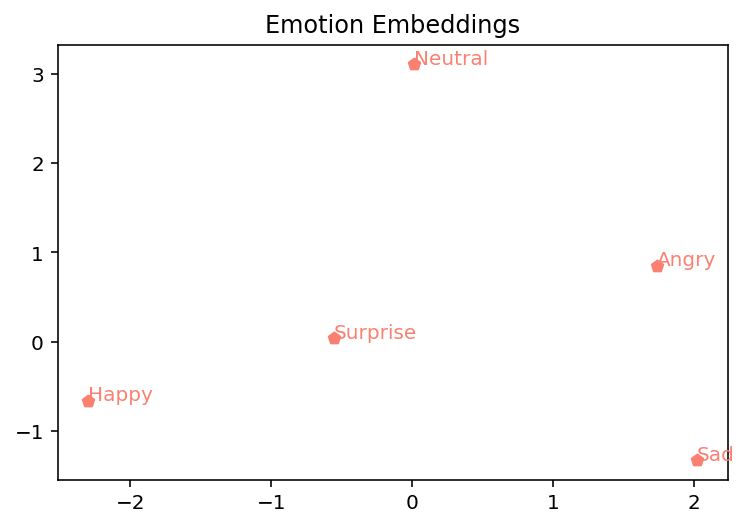

In [36]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Sample word embeddings with length 768
# word_embeddings = {
#     "apple": np.random.rand(768),
#     "banana": np.random.rand(768),
#     "orange": np.random.rand(768),
#     "grape": np.random.rand(768),
#     "pear": np.random.rand(768)
# }

word_embeddings = emo_dict

# Extract the vectors and the labels
vectors = np.array(list(word_embeddings.values()))
labels = list(word_embeddings.keys())

# Reduce the dimensionality of the word embeddings using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

# Plot the word embeddings on a scatter plot
fig, ax = plt.subplots()
# ax.scatter(vectors_pca[:, 0], vectors_pca[:, 1])

# Add labels to the plot
for i, label in enumerate(labels):
    if label in ["Angry", "Happy", "Neutral", "Sad", "Surprise"]:
        ax.annotate(label, (vectors_pca[i, 0], vectors_pca[i, 1]), color='salmon')
        ax.scatter([vectors_pca[i, 0]], [vectors_pca[i, 1]], marker='p', color='salmon')
    # else:
    #     ax.annotate(label, (vectors_pca[i, 0], vectors_pca[i, 1]), color='orange')
    #     ax.scatter([vectors_pca[i, 0]], [vectors_pca[i, 1]], marker='^', color='orange')

# Set the plot title and axis labels
ax.set_title("Emotion Embeddings")
# ax.set_xlabel("Dimension 1")
# ax.set_ylabel("Dimension 2")

# Display the plot
plt.show()

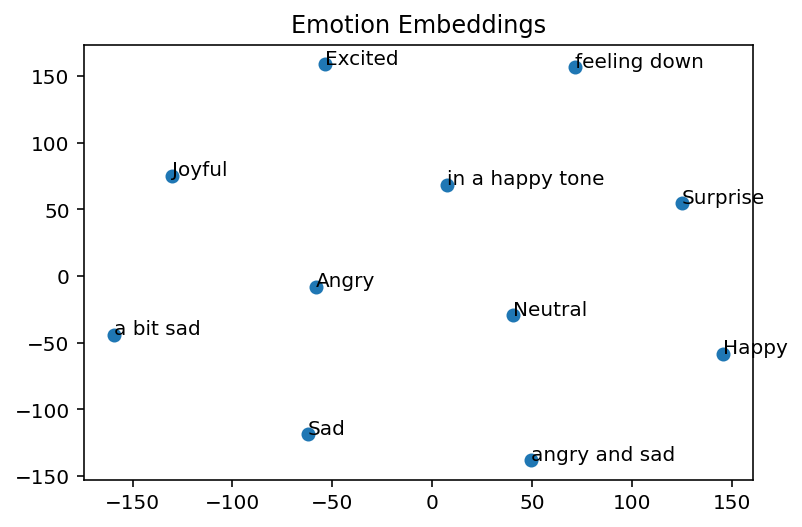

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Sample word embeddings with length 768
word_embeddings = emo_dict

# Extract the vectors and the labels
vectors = np.array(list(word_embeddings.values()))
labels = list(word_embeddings.keys())

# Reduce the dimensionality of the word embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=4)
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word embeddings on a scatter plot
fig, ax = plt.subplots()
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

# Add labels to the plot
for i, label in enumerate(labels):
    ax.annotate(label, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

# Set the plot title and axis labels
ax.set_title("Emotion Embeddings")
# ax.set_xlabel("Dimension 1")
# ax.set_ylabel("Dimension 2")

# Display the plot
plt.show()